# Apllying Clustering K-means in customers data

# Clustering with k-means

Import useful functions,librairies and metrics

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


We will use a very simple dataset with a company customers data.

In [3]:
df = pd.read_csv('/content/drive/My Drive/IAAE/Assignment_1/customer_data_large.csv')
df

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3,0,58,635,88,88,88,8,4,7,65,10,1,718
1,3,1,38,11,1,1,6,1,2,5,63,8,0,8
2,3,0,26,426,49,21,42,8,10,4,57,9,0,238
3,3,1,26,11,4,3,5,7,4,6,38,8,0,30
4,5,1,94,173,43,27,15,5,6,5,41,8,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,3,0,46,709,43,118,247,9,4,5,55,9,0,224
2226,5,2,56,406,0,0,8,8,5,7,71,8,1,30
2227,3,0,91,908,48,12,24,2,13,11,41,8,1,249
2228,4,0,8,428,30,30,61,6,10,3,66,8,0,294


Checking if any value is missung and the statistics in order to identifify outliers :

In [4]:
print(df.isnull().values.any())

False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Education           2230 non-null   int64
 1   Kidhome             2230 non-null   int64
 2   Recency             2230 non-null   int64
 3   MntWines            2230 non-null   int64
 4   MntFruits           2230 non-null   int64
 5   MntSweetProducts    2230 non-null   int64
 6   MntGoldProds        2230 non-null   int64
 7   NumWebPurchases     2230 non-null   int64
 8   NumStorePurchases   2230 non-null   int64
 9   NumWebVisitsMonth   2230 non-null   int64
 10  Age                 2230 non-null   int64
 11  Years_customer      2230 non-null   int64
 12  Num_AcceptedCmp     2230 non-null   int64
 13  MntFishMeatProdcts  2230 non-null   int64
dtypes: int64(14)
memory usage: 244.0 KB


No missing values in this dataset.

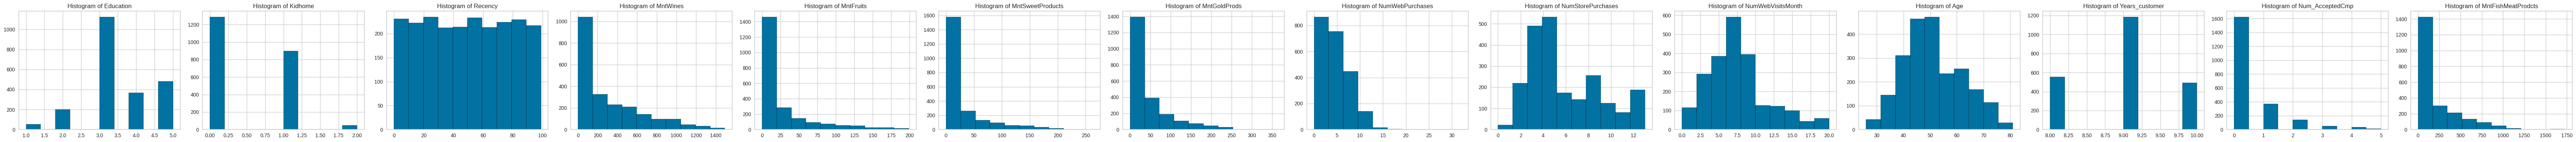

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

if num_cols == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    df[col].hist(ax=ax, bins=10, edgecolor='black')
    ax.set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

Since k-means is a distance-based algorithm, we must scale the data first.

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
df_array = scaler.transform(df)
df_sc = pd.DataFrame(df_array,columns=df.columns,index=df.index)
df_sc

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,0.50,0.0,0.585859,0.425318,0.442211,0.334601,0.243094,0.25000,0.307692,0.35,0.709091,1.0,0.2,0.415411
1,0.50,0.5,0.383838,0.007368,0.005025,0.003802,0.016575,0.03125,0.153846,0.25,0.672727,0.0,0.0,0.004056
2,0.50,0.0,0.262626,0.285332,0.246231,0.079848,0.116022,0.25000,0.769231,0.20,0.563636,0.5,0.0,0.137312
3,0.50,0.5,0.262626,0.007368,0.020101,0.011407,0.013812,0.21875,0.307692,0.30,0.218182,0.0,0.0,0.016802
4,1.00,0.5,0.949495,0.115874,0.216080,0.102662,0.041436,0.15625,0.461538,0.25,0.272727,0.0,0.0,0.094438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.50,0.0,0.464646,0.474883,0.216080,0.448669,0.682320,0.28125,0.307692,0.25,0.527273,0.5,0.0,0.129200
2226,1.00,1.0,0.565657,0.271936,0.000000,0.000000,0.022099,0.25000,0.384615,0.35,0.818182,0.0,0.2,0.016802
2227,0.50,0.0,0.919192,0.608171,0.241206,0.045627,0.066298,0.06250,1.000000,0.55,0.272727,0.0,0.2,0.143685
2228,0.75,0.0,0.080808,0.286671,0.150754,0.114068,0.168508,0.18750,0.769231,0.15,0.727273,0.0,0.0,0.169757


## How to find the best number of clusters with the "elbow" method

In `sklearn`, a k-means model includes an attribute that contains the Sum of Squared Errors (SSE), i.e., the sum of squared distances between each example and its centroid. This attribute is called `inertia_`.

We build a model for each possible value of k and compute the inertia.

In [8]:
sse = []
for i in range(2, 11):
       km = KMeans(n_clusters=i,random_state=0)
       km.fit(df_sc)
       sse.append(km.inertia_)

We plot the values and select k at the "elbow", i.e, the point in which the inertia starts decreasing in a (almost) linear fashion.

We plot also a straigth line to help select the "elbow" visually.

In practice, we can select several values of k around the elbow and explore the results.

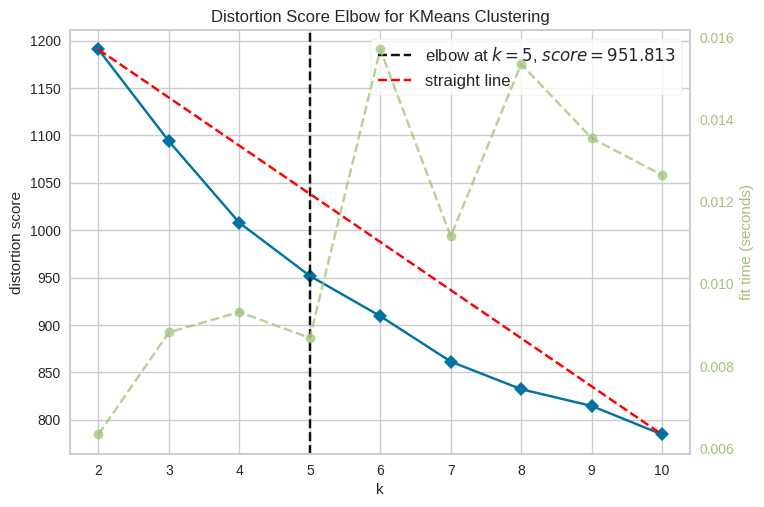

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(df_sc)

ax = visualizer.ax

xpoints = [10, 2]
ypoints = [sse[-1], sse[0]]
sns.lineplot(x=xpoints, y=ypoints, ax=ax, color='red', linestyle="--", label="straight line")

visualizer.show()


Assuming with the previous courb that the optimal number of cluster is 5, we can plot the differences between the centers of each cluster for this value.

In [10]:
optimal_k = 5
km_model = KMeans(n_clusters=optimal_k,random_state=0)
km_model.fit(df_sc)

centroids = pd.DataFrame(km_model.cluster_centers_,columns=df_sc.columns)
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(centroids),index=centroids.index,columns=centroids.columns)
centroids_unscaled

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3.500000,0.770349,48.485465,56.593023,5.220930,6.029070,12.558140,3.203488,3.459302,7.345930,50.087209,8.000000,0.156977,34.186047
1,3.436364,0.049351,25.501299,552.859740,62.992208,55.992208,74.244156,6.392208,8.851948,6.070130,53.776623,8.688312,0.906494,407.148052
2,3.540636,0.088339,51.477032,622.946996,45.558304,49.780919,71.632509,6.604240,8.166078,6.763251,54.190813,10.000000,0.720848,377.325088
3,3.244502,0.860285,47.316947,65.593790,6.372574,7.050453,22.562743,3.680466,3.424321,8.686934,45.086675,9.269082,0.204398,49.940492
4,3.766292,0.038202,71.916854,491.712360,33.062921,38.867416,61.051685,5.692135,7.570787,5.292135,57.247191,8.800000,0.514607,319.521348


In [11]:
df_cluster = df_sc.copy()
df_cluster['cluster'] = km_model.labels_
df_cluster

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts,cluster
0,0.50,0.0,0.585859,0.425318,0.442211,0.334601,0.243094,0.25000,0.307692,0.35,0.709091,1.0,0.2,0.415411,2
1,0.50,0.5,0.383838,0.007368,0.005025,0.003802,0.016575,0.03125,0.153846,0.25,0.672727,0.0,0.0,0.004056,0
2,0.50,0.0,0.262626,0.285332,0.246231,0.079848,0.116022,0.25000,0.769231,0.20,0.563636,0.5,0.0,0.137312,1
3,0.50,0.5,0.262626,0.007368,0.020101,0.011407,0.013812,0.21875,0.307692,0.30,0.218182,0.0,0.0,0.016802,0
4,1.00,0.5,0.949495,0.115874,0.216080,0.102662,0.041436,0.15625,0.461538,0.25,0.272727,0.0,0.0,0.094438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.50,0.0,0.464646,0.474883,0.216080,0.448669,0.682320,0.28125,0.307692,0.25,0.527273,0.5,0.0,0.129200,1
2226,1.00,1.0,0.565657,0.271936,0.000000,0.000000,0.022099,0.25000,0.384615,0.35,0.818182,0.0,0.2,0.016802,0
2227,0.50,0.0,0.919192,0.608171,0.241206,0.045627,0.066298,0.06250,1.000000,0.55,0.272727,0.0,0.2,0.143685,4
2228,0.75,0.0,0.080808,0.286671,0.150754,0.114068,0.168508,0.18750,0.769231,0.15,0.727273,0.0,0.0,0.169757,1


## Suggestions for the assignment

These are some suggestions about topics, methods or procedures that you can apply in your assignment:

* Use a parallel coordinates plot to visualize the differences between the centers of each cluster.
* Compute the standard deviation of the values in the centers for each variable. If a variable has a very different value between the centers, the std should be high, if most of the centers have the same value, it should be low.
* Choose different pairs of variables and make a scatter plot using colors to mark the clusters.
* Look at  https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation for evaluation metrics that do not require knowledge of the original classes in the data. Check if the results are the same as inertia for different k values.
* Compare the histograms for a single variable among the different clusters.
* Using the `transform` method of the k-means model we can obtain the distance of each example to every center. We can use this information to locate extreme points very far from the center or points that are very close to more than one center.
* Add the assigned clusters to the original dataset, compute PCA and plot the two first components using different colors for the clusters.
* The yellowbrick library offers some nice visualizers: https://www.scikit-yb.org/en/latest/api/cluster/index.html



# **Plotting parallel coordinates to vizualise the clusters**

We plot both centroids scaled, and unscaled.

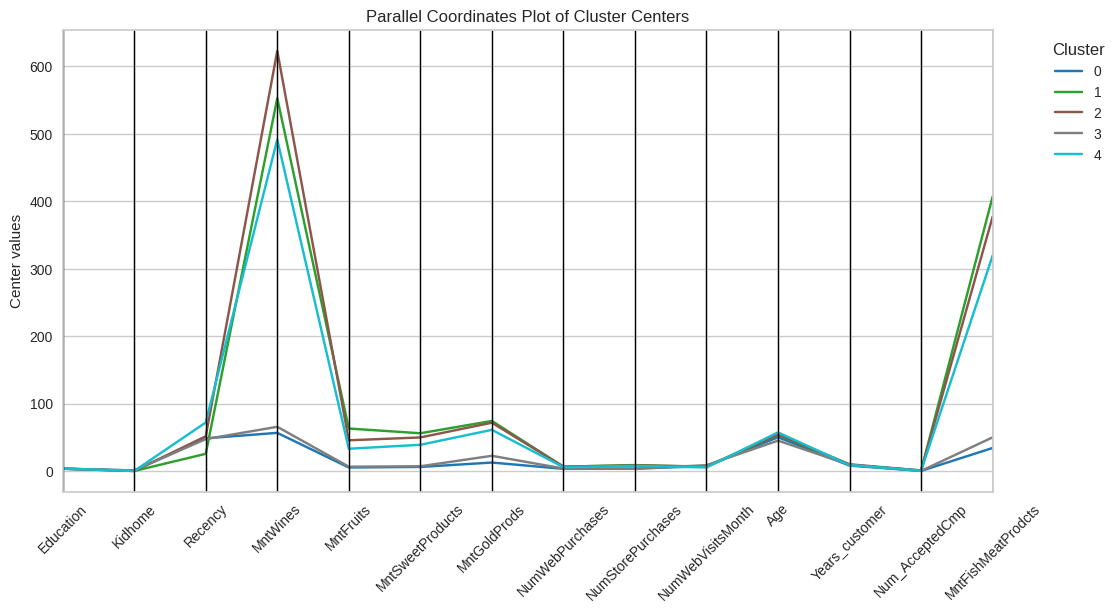

In [12]:
centroids_unscaled['cluster'] = centroids_unscaled.index.astype(str)

plt.figure(figsize=(12, 6))
parallel_coordinates(centroids_unscaled, class_column='cluster', colormap=plt.get_cmap("tab10"))
plt.xticks(rotation=45)
plt.ylabel("Center values")
plt.title("Parallel Coordinates Plot of Cluster Centers")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

The large differences and values in the *MntWines* column make difficult to identify differences in others columns like *NumWebPurchases* or *NumStorePurchases* for instance.

Let's plot the scaled centroids to see differences more precisely:

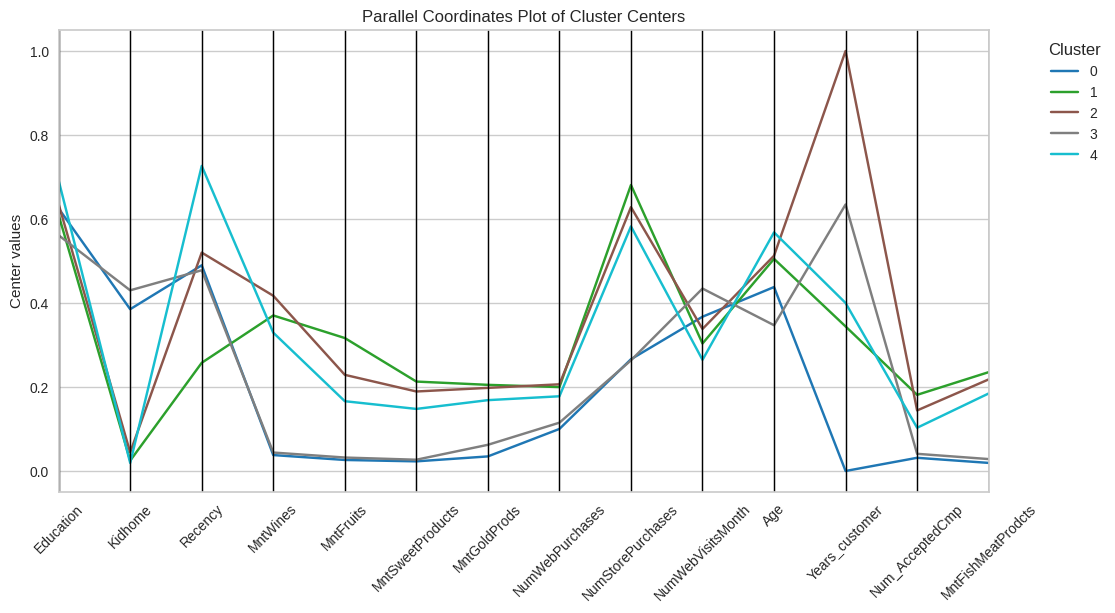

In [13]:
centroids['cluster'] = centroids.index.astype(str)

plt.figure(figsize=(12, 6))
parallel_coordinates(centroids, class_column='cluster', colormap=plt.get_cmap("tab10"))
plt.xticks(rotation=45)
plt.ylabel("Center values")
plt.title("Parallel Coordinates Plot of Cluster Centers")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

We compute the standard deviation of the values in the centers for each variable (except the cluster column of course).

In [14]:
std_dev = centroids_unscaled.drop(columns='cluster').std()
std_dev

,0
Education,0.188323
Kidhome,0.416089
Recency,16.481702
MntWines,274.951707
MntFruits,25.050592
MntSweetProducts,23.637248
MntGoldProds,28.809449
NumWebPurchases,1.572732
NumStorePurchases,2.643318
NumWebVisitsMonth,1.290471


Ploting histograms for each values of centroids:

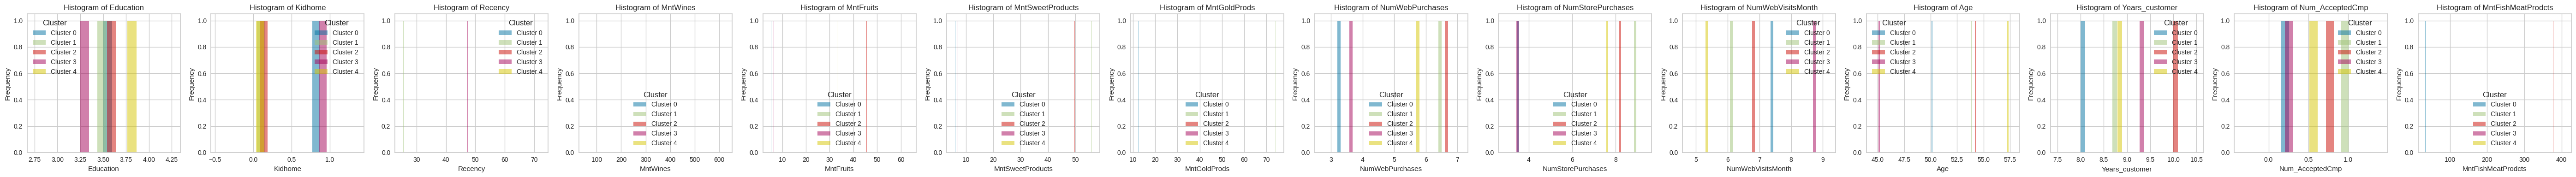

In [15]:
n_columns = len(centroids_unscaled.drop(columns='cluster').columns)

fig, axes = plt.subplots(1, n_columns, figsize=(n_columns * 4, 4))

if n_columns == 1:
    axes = [axes]

for idx, column in enumerate(centroids_unscaled.drop(columns='cluster').columns):
    ax = axes[idx]

    for cluster in centroids_unscaled['cluster'].unique():
        cluster_data = centroids_unscaled[centroids_unscaled['cluster'] == cluster][column]

        ax.hist(cluster_data, bins=10, alpha=0.5, label=f"Cluster {cluster}")

    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(True)
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()

According to the charts and standard deviations, the main differences seem to be in the columns *Recency*, *MntWines*, *MntFruits*, *MntSweetProducts*, *MntGoldProds*, and *MntFishMeatProducts*.

This is coherent with the histograms plotted earlier: the values for MntWines can reach over 1400€ for a very small number of customers, while most do not buy wine at all. The same situation applies to *MntFishMeatProducts*, leading to significant differences between centroid values in these columns.

For the *Recency*, *MntFruits*, *MntSweetProducts*, and *MntGoldProds* columns, the standard deviation is lower but still considerable. Indeed, these columns follow a similar distribution to MntFishMeatProducts and MntWines, but with a smaller range of values, typically between 0€ and around 200€.

Additionally, we can observe that it appears to be the same group of customers who purchase high-value items such as wine, gold, and fish. That can be a way to classify customers.

One possible approach to simplifying the model and reduce the number of clusters could be to transform these columns into binary variables. For example:

*   Wine: 1 if the customer spends more than 200€, 0 otherwise.
*   Gold: 1 if the customer spends more than 50€, 0 otherwise.
*   Fish: 1 if the customer spends more than 100€, 0 otherwise.







# **Outliers and ambiguous points identification**

We can now try to locate extreme points very far from the center or points that are very close to more than one center with the transform method:

In [16]:
distances = km_model.transform(df_sc)
distance_df = pd.DataFrame(distances, columns=[f"dist_cluster_{i}" for i in range(optimal_k)])
distance_df

,dist_cluster_0,dist_cluster_1,dist_cluster_2,dist_cluster_3,dist_cluster_4
0,1.385757,0.896598,0.527935,1.052901,0.844527
1,0.359919,1.050608,1.373184,0.765603,0.989078
2,0.958836,0.376254,0.666051,0.867487,0.578839
3,0.389305,0.977578,1.349686,0.714752,1.024801
4,0.709044,1.117696,1.334158,0.976847,0.850698
...,...,...,...,...,...
2225,1.145271,0.759907,0.850707,1.047328,0.771576
2226,0.889023,1.320889,1.545132,1.127162,1.212041
2227,1.168740,0.960361,1.234568,1.323415,0.840266
2228,0.922047,0.577769,1.167289,1.175235,0.817366


To identify points very far from their center, we will look for the top 2% most far points.

We begin by computing the distance of each point to their center:

In [17]:
assigned_distances = distances[np.arange(len(distances)), km_model.labels_]
df_cluster['min_distance'] = assigned_distances

Identify top 2% of the most far points by adding a column 'is_outlier':

In [18]:
outlier_threshold = np.percentile(assigned_distances, 98)
df_cluster['is_outlier'] = df_cluster['min_distance'] > outlier_threshold

Now, to identify points that can be close to two centers we sort the distances and compute a 'ambiguity_ratio' that compares the two first distances:

In [19]:
sorted_distances = np.sort(distances, axis=1)
df_cluster['second_min_distance'] = sorted_distances[:, 1]
df_cluster['ambiguity_ratio'] = df_cluster['second_min_distance'] / df_cluster['min_distance']

We fix that, if the second distance is less than 5% higher, the point is ambiguous:

In [20]:
ambiguity_limit = 1.05
df_cluster['is_ambiguous'] = df_cluster['ambiguity_ratio'] < ambiguity_limit

Let's see the results:

In [21]:
df_cluster[df_cluster['is_outlier']][['cluster', 'min_distance', 'is_outlier']]

,cluster,min_distance,is_outlier
21,3,1.101224,True
27,3,1.722544,True
161,4,1.227199,True
247,1,1.170898,True
424,1,1.130395,True
537,1,1.158674,True
553,4,1.188461,True
585,2,1.105632,True
681,3,1.290631,True
717,4,1.083571,True


We can see that the distances never reach over 2, which is a good thing and coherent with the fact that our model has not been chosen as too simple.

In [22]:
df_cluster[df_cluster['is_ambiguous']][['cluster', 'min_distance', 'second_min_distance','is_ambiguous', 'ambiguity_ratio']]

,cluster,min_distance,second_min_distance,is_ambiguous,ambiguity_ratio
27,3,1.722544,1.763291,True,1.023655
36,4,0.669378,0.676407,True,1.010501
45,1,0.948475,0.973817,True,1.026719
54,3,0.685473,0.691962,True,1.009467
88,4,0.752028,0.768815,True,1.022322
...,...,...,...,...,...
2173,0,0.714509,0.733719,True,1.026886
2179,4,0.700722,0.717883,True,1.024490
2207,1,1.069621,1.108862,True,1.036688
2218,2,1.138535,1.144424,True,1.005173


Here, we have many more ambiguous points. A simpler model would have decreased this, but still, it represents only \( \frac{146}{2230} = 6\% \) of the data.

One can accept this balance between outliers and ambiguous points, but we keep in mind that it can be changed in order to reduce the number of ambiguous points by reducing the number of clusters.

# **Lets compare inertia with metrics that do not require knowledge of the original classes in the data.**

## Silhouette Score

This metric evaluates how similar a point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

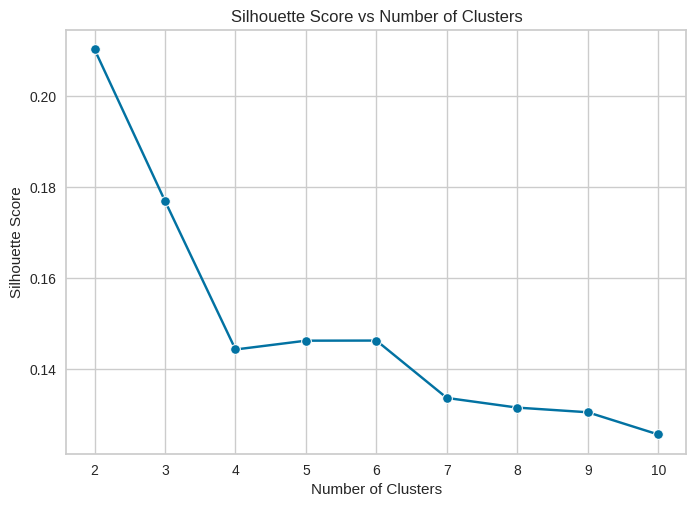

In [23]:
sil_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_sc)
    score = silhouette_score(df_sc, km.labels_)
    sil_scores.append(score)

sns.lineplot(x=range(2, 11), y=sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

Here we can see that higher values are for 2 clusters. Which can be coherent with our previous analysis suggestion of reducing clusters and simplifying some columns.

We will keep in mind this suggestion of 2 clusters made by the silhouette score.

## Calinski-Harabasz Index

Here also, the higher Calinski-Harabasz is, the better defined our clusters are.

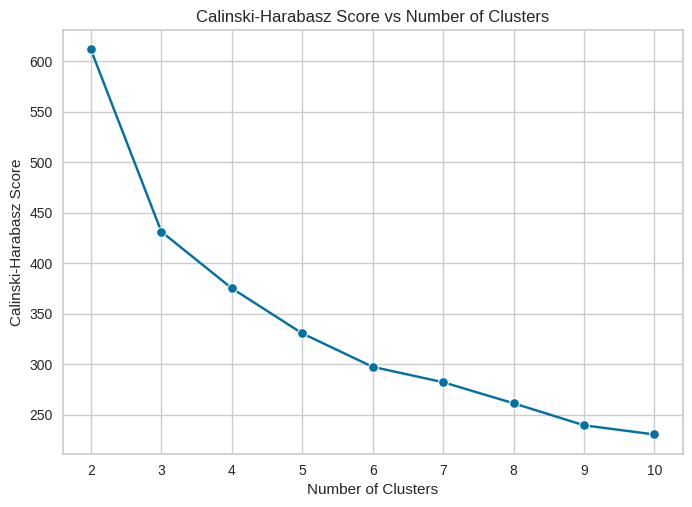

In [24]:
ch_scores = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_sc)
    score = calinski_harabasz_score(df_sc, km.labels_)
    ch_scores.append(score)

sns.lineplot(x=range(2, 11), y=ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.show()

Here again, two clusters are suggested.

## Davies Bouldin Score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

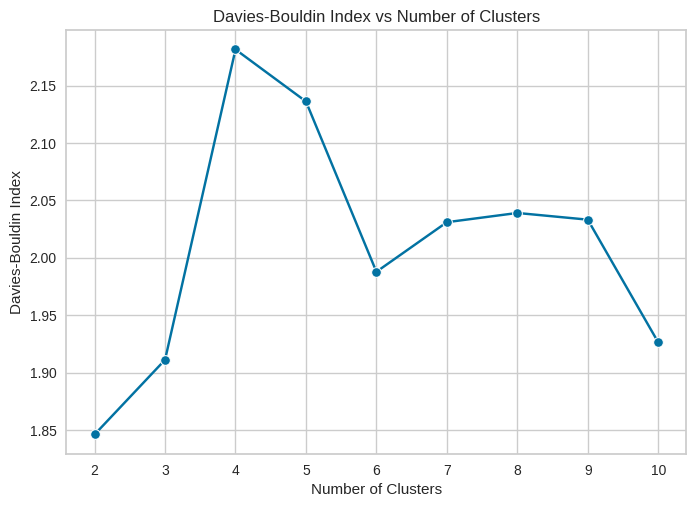

In [25]:
dbi_scores = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_sc)
    score = davies_bouldin_score(df_sc, km.labels_)
    dbi_scores.append(score)

sns.lineplot(x=range(2, 11), y=dbi_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.show()

This metric also suggest 2 clusters. Moreover, 5 clusters has a very high score, that means clusters poorly separated in our model.


#**Computing PCA**

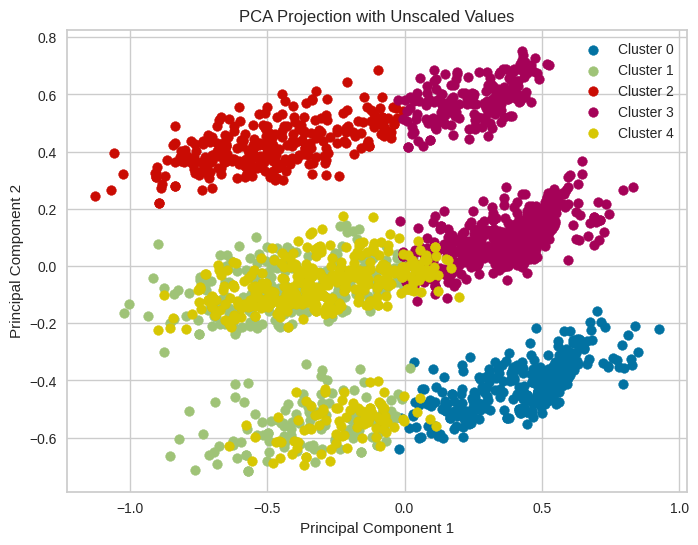

In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_sc)

pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
pca_df['cluster'] = km_model.labels_

plt.figure(figsize=(8, 6))
for cluster in np.unique(km_model.labels_):
    plt.scatter(pca_df.loc[pca_df['cluster'] == cluster, 'PC1'],
                pca_df.loc[pca_df['cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Unscaled Values')
plt.legend()
plt.show()

It seems that we have too many clusters. The result is coherent with  Davies-Bouldin Index that suggested 5 clusters as a poor choice when dealing with well separated clusters.

Let's visualize if the first two components are very representative.

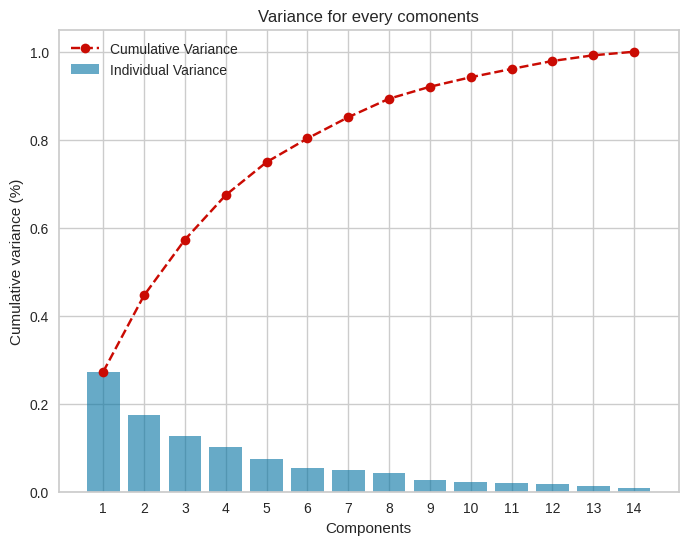

In [27]:
pca = PCA()
pca.fit(df_sc)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative Variance')
plt.xlabel('Components')
plt.ylabel('Cumulative variance (%)')
plt.title('Variance for every comonents')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.show()

The first two components represents about 45% of the cumulative variance. Maybe PCA projection is not very representative of the reality. That would explain the superposition of cluster 4 and cluster 1 in the previous PCA chart.
But still, as the previous metrics suggested, it seems that 5 clusters is not an optimal choice.

Let's see what the tSNE shows.

# **Computing tSNE**

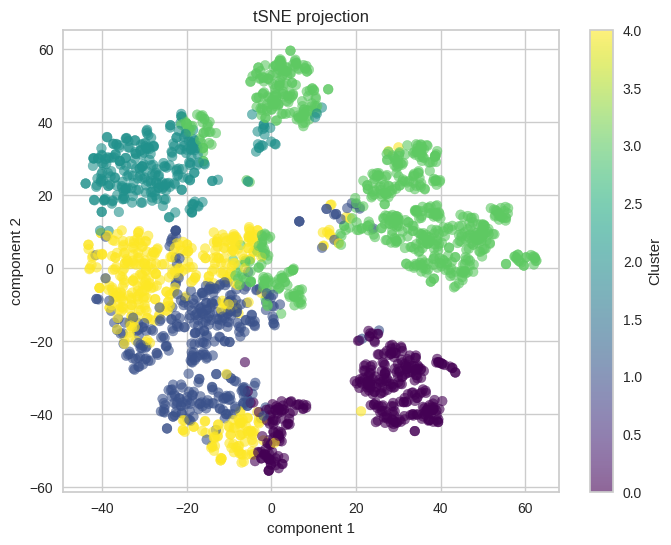

In [28]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(df_sc)
clusters = km_model.labels_

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('tSNE projection')
plt.colorbar(label='Cluster')
plt.show()

It seems that cluster 4 is kind of a transition between cluster 1 and either cluster 0 or 2. This model might be kept if we want high precision when classifying customers but here, to simplify classification, we will prefer to reduce the number of clusters.

As the silhouette score, Calinski Harabasz Score and  Davies-Bouldin Index suggested we will train a model with 2 clusters.

# **Reducing number of clusters**

We follow the same steps as our previous model but here, with two clusters.

In [29]:
optimal_k = 2
km_model = KMeans(n_clusters=optimal_k,random_state=0)
km_model.fit(df_sc)

centroids = pd.DataFrame(km_model.cluster_centers_,columns=df_sc.columns)
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(centroids),index=centroids.index,columns=centroids.columns)
df_cluster = df_sc.copy()
df_cluster['cluster'] = km_model.labels_

## Parallel Coordinates:

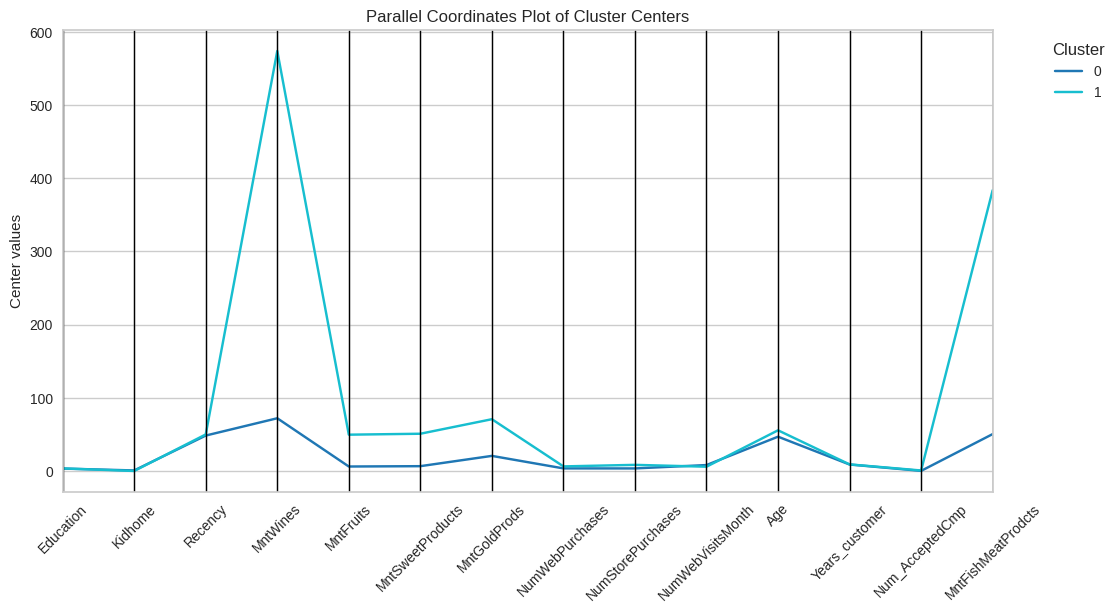

In [30]:
centroids_unscaled['cluster'] = centroids_unscaled.index.astype(str)

plt.figure(figsize=(12, 6))
parallel_coordinates(centroids_unscaled, class_column='cluster', colormap=plt.get_cmap("tab10"))
plt.xticks(rotation=45)
plt.ylabel("Center values")
plt.title("Parallel Coordinates Plot of Cluster Centers")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

Outliers and ambiguous points:

In [31]:
distances = km_model.transform(df_sc)
distance_df = pd.DataFrame(distances, columns=[f"dist_cluster_{i}" for i in range(optimal_k)])
assigned_distances = distances[np.arange(len(distances)), km_model.labels_]
df_cluster['min_distance'] = assigned_distances
outlier_threshold = np.percentile(assigned_distances, 98)
df_cluster['is_outlier'] = df_cluster['min_distance'] > outlier_threshold
np.sort(distances, axis=1)
df_cluster['second_min_distance'] = sorted_distances[:, 1]
df_cluster['ambiguity_ratio'] = df_cluster['second_min_distance'] / df_cluster['min_distance']
ambiguity_limit = 1.05
df_cluster['is_ambiguous'] = df_cluster['ambiguity_ratio'] < ambiguity_limit
df_cluster[df_cluster['is_outlier']][['cluster', 'min_distance', 'is_outlier']]

,cluster,min_distance,is_outlier
27,0,1.727581,True
90,0,1.129529,True
161,0,1.350785,True
243,1,1.149690,True
247,1,1.304620,True
411,1,1.133838,True
424,1,1.187630,True
497,1,1.188420,True
537,1,1.195654,True
553,1,1.136294,True


In [32]:
df_cluster[df_cluster['is_ambiguous']][['cluster', 'min_distance', 'second_min_distance','is_ambiguous', 'ambiguity_ratio']]

,cluster,min_distance,second_min_distance,is_ambiguous,ambiguity_ratio
4,0,0.848270,0.850698,True,1.002862
17,1,0.801308,0.773536,True,0.965342
20,0,0.818751,0.745262,True,0.910242
22,1,0.828860,0.862103,True,1.040106
23,1,0.922894,0.929430,True,1.007082
...,...,...,...,...,...
2207,1,1.121789,1.108862,True,0.988477
2214,1,0.816995,0.777279,True,0.951388
2215,0,0.700508,0.678565,True,0.968677
2218,0,1.213422,1.144424,True,0.943137


The results are similar as our previous model. We have a little bit more outliers but that remains acceptable.

## PCA


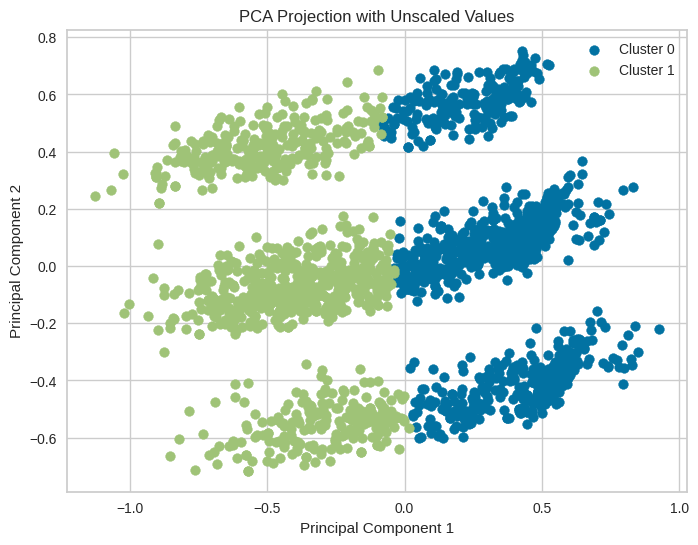

In [33]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_sc)

pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
pca_df['cluster'] = km_model.labels_

plt.figure(figsize=(8, 6))
for cluster in np.unique(km_model.labels_):
    plt.scatter(pca_df.loc[pca_df['cluster'] == cluster, 'PC1'],
                pca_df.loc[pca_df['cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Unscaled Values')
plt.legend()
plt.show()

Here, clusters are well defined.

## tSNE

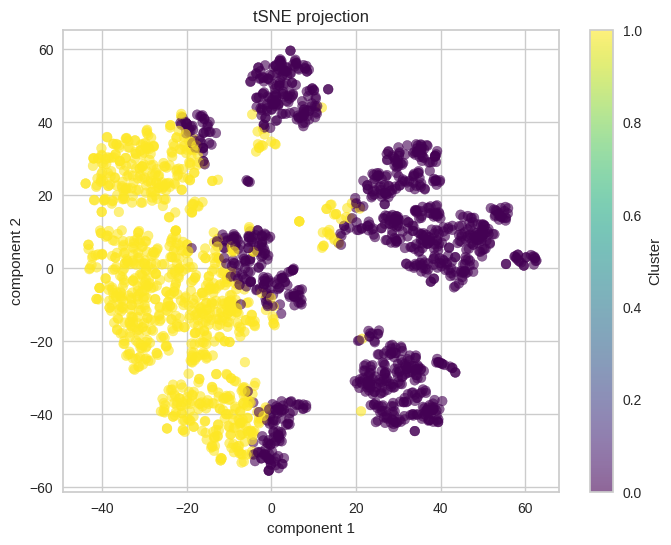

In [34]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(df_sc)
clusters = km_model.labels_

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('tSNE projection')
plt.colorbar(label='Cluster')
plt.show()

We have to keep in mind that tSNE does not provide reliable information on distances between clusters. Therefore, it is not a major issue if the two clusters overlap a little bit.

Since the tSNE is more focused on grouping together points from the same cluster, that might suggest 6 clusters but the result remains good to us and we decide to keep this 2 clusters model.

# **Profiling clients**

Although this model can be seemed simple since it has only two clusters, it might be efficient to assess whether a client is likely to buy expensive purchases or not.



Indeed, as the parallel coordinates shows, features that make the more difference in order to classify clients are Wines, Meat and Fish, and Gold.

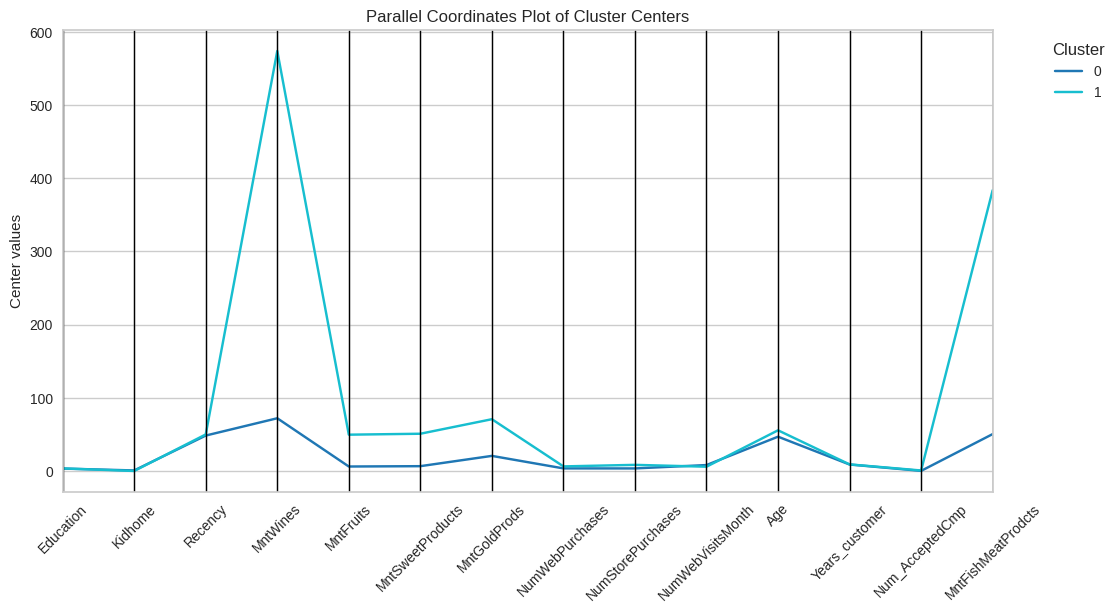

In [35]:
centroids_unscaled['cluster'] = centroids_unscaled.index.astype(str)

plt.figure(figsize=(12, 6))
parallel_coordinates(centroids_unscaled, class_column='cluster', colormap=plt.get_cmap("tab10"))
plt.xticks(rotation=45)
plt.ylabel("Center values")
plt.title("Parallel Coordinates Plot of Cluster Centers")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

We will remember that this model allows us to classify a customer as a high-spending client, potentially interested in purchasing luxury products.